# Importing Libraries


In [85]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report 

# Loading Datasets

In [86]:
df=read_csv('glass.csv')

In [87]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Performing EDA

In [88]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [90]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [91]:
df.shape

(214, 10)

In [92]:
df.duplicated().sum()

1

In [93]:
df=df.drop_duplicates()

# Splitting Data

In [94]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [95]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [96]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

# Scaling The Data

 # Normalizing data


In [97]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [98]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [99]:
X=X.values
Y=Y.values

In [100]:
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [101]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

# Dividing The Data into Training and Testing 

In [102]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=19)

In [103]:
n_neighbors=[2*i+1 for i in range(0,27)]
for n in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy_score(y_test,pred)
    
    print(classification_report(y_test,pred),n)

              precision    recall  f1-score   support

           1       0.62      0.90      0.73        20
           2       0.72      0.65      0.68        20
           3       1.00      0.29      0.44         7
           5       0.60      0.75      0.67         4
           6       1.00      0.33      0.50         3
           7       1.00      0.90      0.95        10

    accuracy                           0.72        64
   macro avg       0.82      0.64      0.66        64
weighted avg       0.77      0.72      0.71        64
 1
              precision    recall  f1-score   support

           1       0.57      0.85      0.68        20
           2       0.63      0.60      0.62        20
           3       1.00      0.14      0.25         7
           5       0.60      0.75      0.67         4
           6       1.00      0.33      0.50         3
           7       1.00      0.80      0.89        10

    accuracy                           0.66        64
   macro avg       0.

# Visualizing

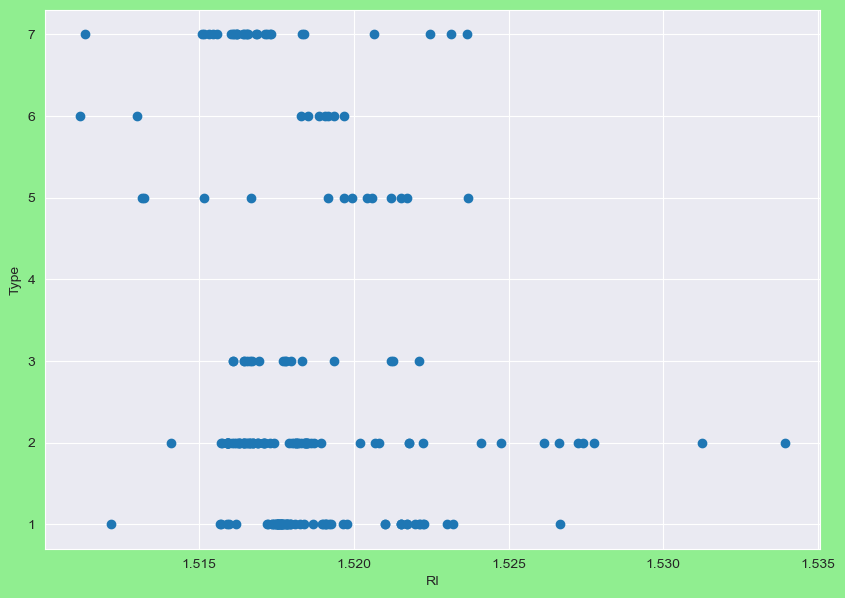

In [104]:
plt.figure(figsize=(10,7),facecolor="LightGreen")
plt.scatter(df.RI,df.Type)
plt.xlabel("RI")
plt.ylabel("Type")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


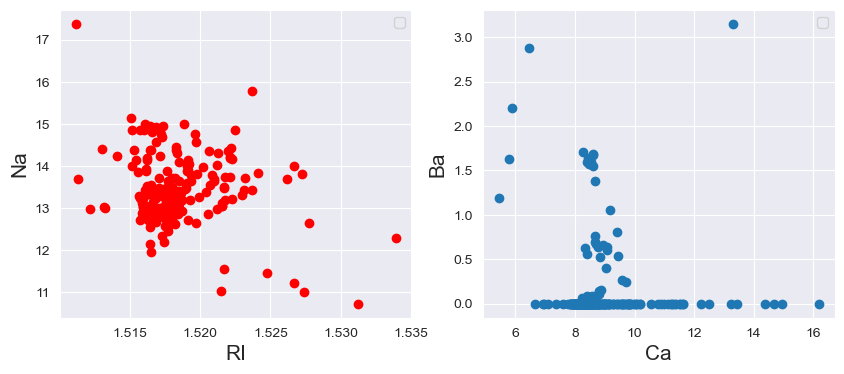

In [105]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df["RI"],df["Na"],color="red")
plt.xlabel("RI",size=15)
plt.ylabel("Na",size=15)
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.scatter(df["Ca"],df["Ba"])
plt.xlabel("Ca",size=15)
plt.ylabel("Ba",size=15)
plt.legend(loc="best")

In [106]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<AxesSubplot:>

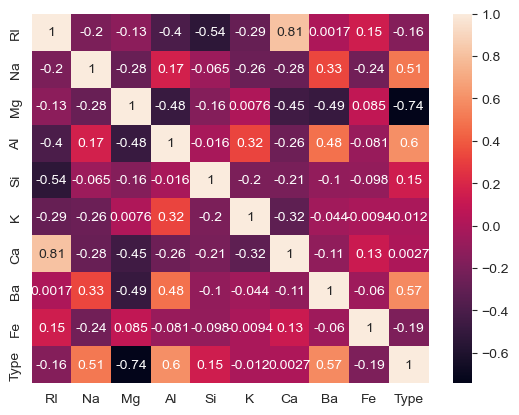

In [107]:
sns.heatmap(df.corr(),annot=True)

# Scatterplot Between Variables Along With Histograms


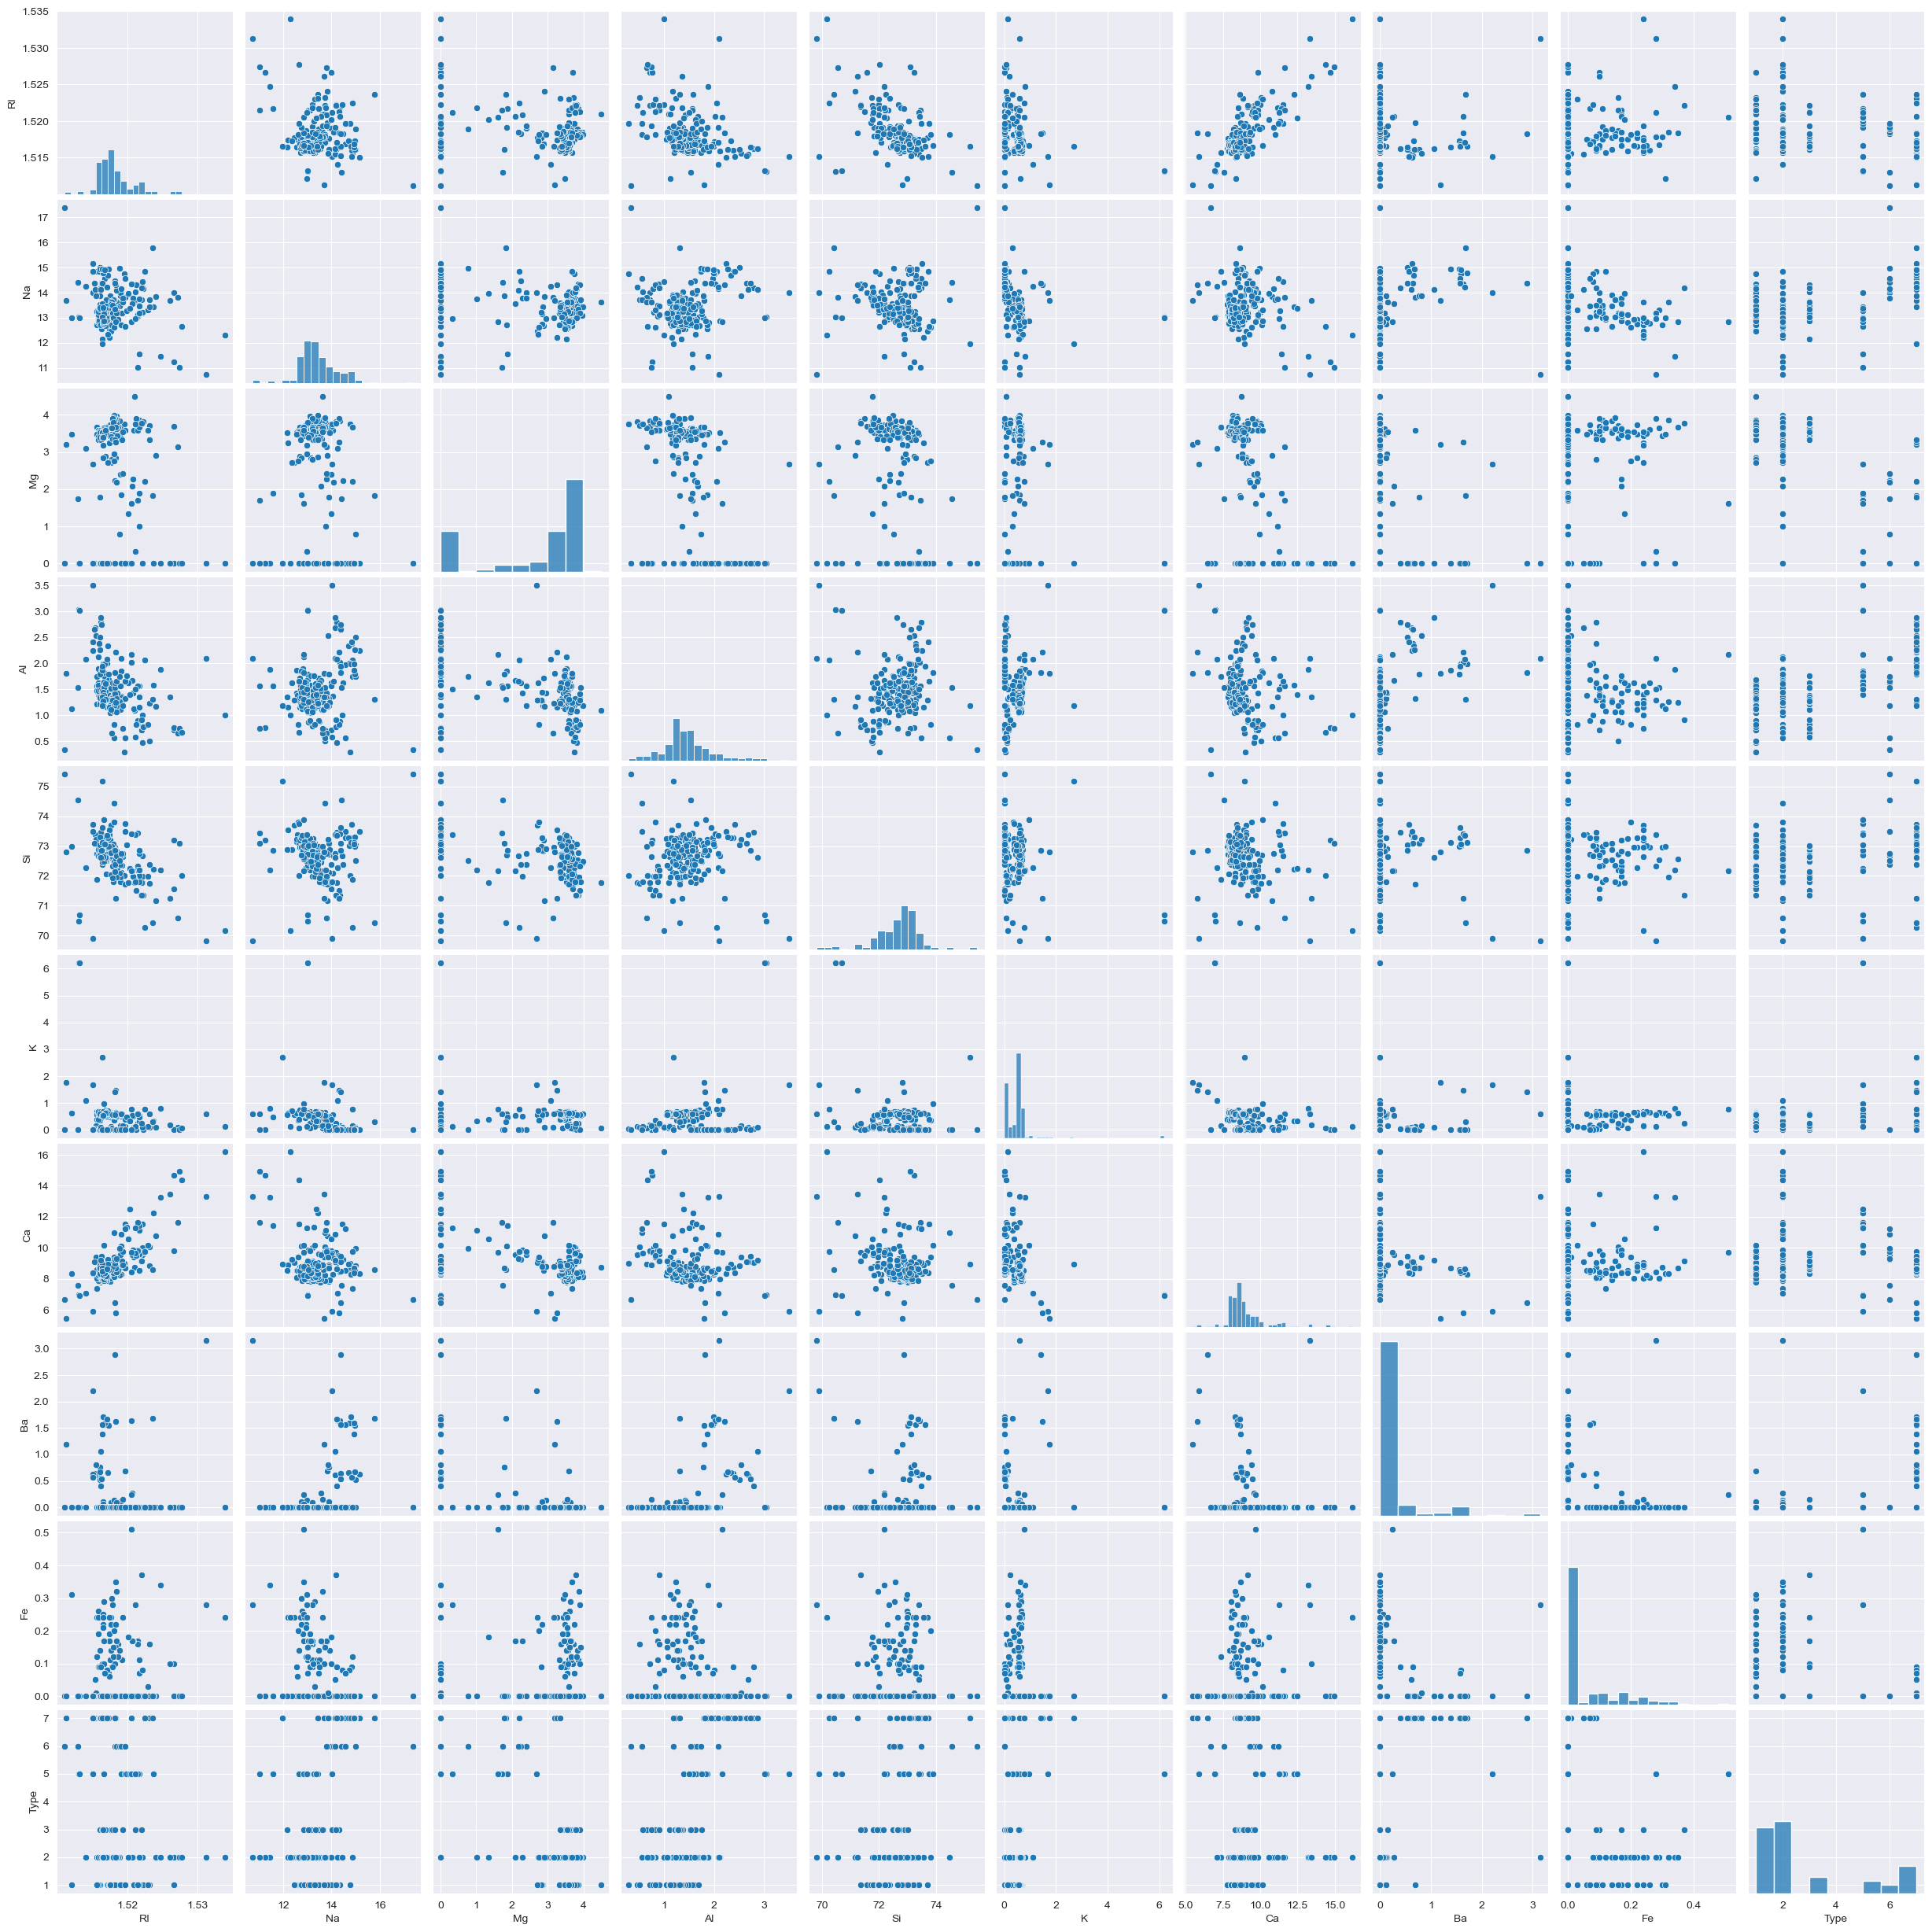

In [108]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

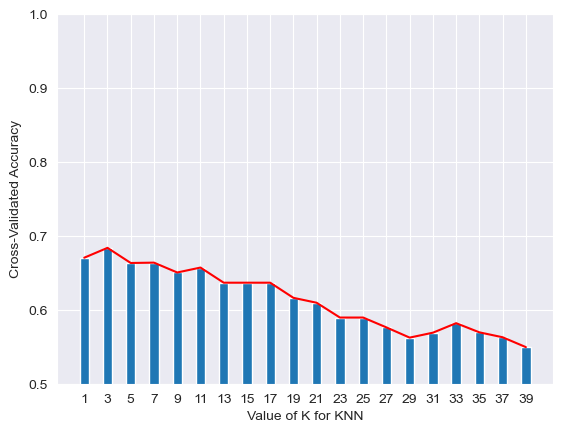

In [114]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train,cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.5,1)
plt.show()

In [115]:
np.argmax(k_scores)

1

In [116]:
k_range[1]

3

In [117]:
k_scores[3]

0.6638095238095237

# Model Building

In [118]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred=model.predict(x_test)

# Testing The Model

In [119]:
accuracy_score(pred,y_test)

0.65625

# Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test, pred)
conf_matrix

array([[17,  3,  0,  0,  0,  0],
       [ 8, 12,  0,  0,  0,  0],
       [ 5,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  1,  0,  1,  1,  0],
       [ 0,  1,  0,  1,  0,  8]], dtype=int64)

# Classification Report

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.57      0.85      0.68        20
           2       0.63      0.60      0.62        20
           3       1.00      0.14      0.25         7
           5       0.60      0.75      0.67         4
           6       1.00      0.33      0.50         3
           7       1.00      0.80      0.89        10

    accuracy                           0.66        64
   macro avg       0.80      0.58      0.60        64
weighted avg       0.72      0.66      0.64        64

